In [36]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import patsy as pt

from interpret import show
from interpret.blackbox import ShapKernel, PartialDependence

In [4]:
data = pd.read_csv('./DATA/pakistanClean2.csv')

In [5]:
#valid_train_Values = ['0','1']
#work_data = data[data.TTP.isin(valid_train_Values)] 
work_data = data[(data['TTP']==0) | (data['TTP'] ==1)]
test_data = data[pd.isna(data['TTP'])]
work_data = work_data.fillna(-99)

Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.


In [6]:
# Create regression arrays
Y, X = pt.dmatrices("TTP ~ C(iyear) + C(provstate) + multiple + success + suicide + attacktype1 + C(targtype1) + C(targsubtype1) + weaptype1 + weapsubtype1 + nkill + nkillus + nkillter + nwound + nwoundus + nwoundte + C(Month)", data = work_data)

In [33]:
names = X.design_info.column_names
names = [i.replace('[', '').replace(']', '').replace(' ', '').replace(',', '') for i in names]

In [7]:
# Randomly create train and test data
x, xt, y, yt = train_test_split(X, Y, test_size = 0.25,random_state=35)

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Generate the random forest model
writingForest = RandomForestClassifier(n_estimators=110, n_jobs = -1, random_state=35)
# Fit the model to the training data
fclf = writingForest.fit(x, y)
# Make predictions
fpred = fclf.predict(xt)
# Print the accuracy score of the fitted model
print("The random forest has an accuracy of : %s\n" % str(accuracy_score(fpred, yt)))

<ipython-input-8-56219351c414>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fclf = writingForest.fit(x, y)


The random forest has an accuracy of : 0.8175937904269082



In [34]:
shap = ShapKernel(predict_fn=writingForest.predict_proba, data=pd.DataFrame(x, columns=names)[:100])

In [35]:
shap_local = shap.explain_local(pd.DataFrame(xt)[:5], pd.DataFrame(yt)[:5])

show(shap_local)

  0%|          | 0/5 [00:00<?, ?it/s]num_full_subsets = 1
remaining_weight_vector = [0.12794589 0.08633747 0.06555252 0.05309754 0.04480805 0.0388993
 0.03447893 0.0310512  0.02831869 0.02609216 0.02424545 0.02269126
 0.02136722 0.02022764 0.01923824 0.01837285 0.01761113 0.01693702
 0.01633771 0.01580284 0.01532397 0.01489412 0.01450753 0.01415935
 0.01384551 0.01356259 0.01330766 0.01307821 0.01287213 0.01268759
 0.01252301 0.01237705 0.01224857 0.01213658 0.01204026 0.01195891
 0.01189195 0.01183892 0.01179945 0.01177329 0.01176025]
num_paired_subset_sizes = 42
weight_left = 0.7981830466727807
np.sum(w_aug) = 85.0
np.sum(self.kernelWeights) = 0.9999999999999999
phi = [ 0.         -0.00579026  0.          0.          0.          0.
  0.00473505  0.          0.00516009 -0.00941601  0.          0.11164327
 -0.02978955  0.         -0.03691195  0.          0.          0.
  0.00987303 -0.00838209  0.          0.          0.          0.
  0.          0.          0.          0.0069706   0. 

<!-- http://127.0.0.1:7001/2441637758720/ -->

No overall plot to display: -1|ShapKernel_3
No overall plot to display: -1|ShapKernel_3
No overall plot to display: -1|ShapKernel_3


In [39]:
pdp = PartialDependence(predict_fn=writingForest.predict_proba, data=pd.DataFrame(x, columns=names))

In [40]:
pdp_global = pdp.explain_global()

show(pdp_global)

Generating mini dash
Generated mini dash


<!-- http://127.0.0.1:7001/2441487644560/ -->

No overall plot to display: -1|PartialDependence_0
No overall plot to display: -1|PartialDependence_0
No overall plot to display: -1|ShapKernel_3
No overall plot to display: -1|PartialDependence_0


In [9]:
from sklearn.neighbors import KNeighborsClassifier
# Declare our classifier and its parameters
model = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
# 'Fit' the model to the data
reg = model.fit(x, y)
# Generate predicted labels for our test data
pred = reg.predict(xt)
# Calculate accuracy score
accuracy_score(pred, yt)
print("The KNN has an accuracy of : %s\n" % str(accuracy_score(pred, yt)))

The KNN has an accuracy of : 0.7011642949547219



C:\Users\thejj\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [10]:
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(x,y)

#
y_logpred=logreg.predict(xt)
#y_pred
#accuracy_score(y_logpred, yt)
print("The LogisticRegression has an accuracy of : %s\n" % str(accuracy_score(y_logpred, yt)))

The LogisticRegression has an accuracy of : 0.7787839586028461



C:\Users\thejj\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\thejj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
import xgboost as xgb

dtrain = xgb.DMatrix(x, label=y, feature_names=names)
dtest = xgb.DMatrix(xt, feature_names=names)

params = {'max_depth':10,
          'eta':0.5, # metric for reducing overfitting
          'objective':'binary:logistic'}

xmodel = xgb.train(params, dtrain,20) # 20 is the number of boosting rounds undertaken by the model

xpreds = xmodel.predict(dtest)
preds_bin = [int(i>0.5) for i in xpreds]
print(f"Accuracy{accuracy_score(yt, preds_bin)}")

[11:38:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy0.8059508408796895


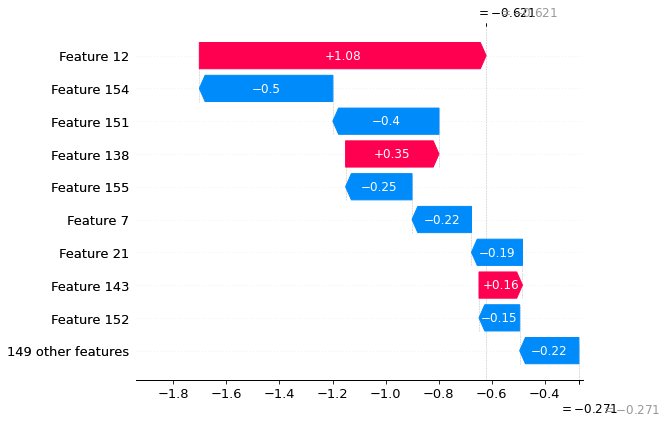

In [46]:
import shap 
from shap.plots._waterfall import waterfall_legacy

# Parse our model to prep for explanation
explainer = shap.TreeExplainer(xmodel)

shap_values = explainer.shap_values(x)
# Make the plot
waterfall_legacy(explainer.expected_value, shap_values[1], x[0])

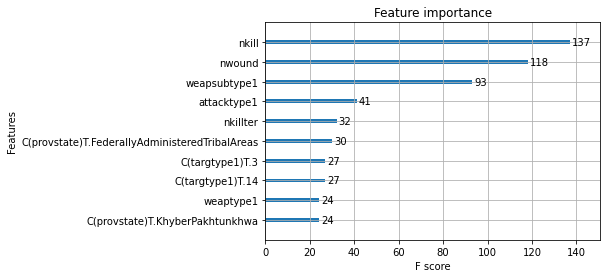

In [47]:
from xgboost import plot_importance
from matplotlib import pyplot

# plot feature importance
plot_importance(xmodel, max_num_features=10)
pyplot.show()